In [1]:
import authClient

ModuleNotFoundError: No module named 'authClient'

In [2]:
import authClient as ac

ModuleNotFoundError: No module named 'authClient'

In [3]:
from dl import authClient as ac

In [10]:
from dl import queryClient as qc

In [5]:
from dl import storeClient as sc

In [6]:
from dl import helpers 

In [7]:
token=ac.login('mgkadrmas')

In [85]:
ra=84.0
dec=-64.0
rad=0.5

In [88]:
res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(rad)+')')
df=helpers.utils.convert(res,'table')

In [29]:
print(df['pmra'])

      pmra     
---------------
  2.28379565233
  2.51001824599
  2.26413377374
  1.50220110715
   2.7765824664
  2.08999845982
            nan
  -1.0395928493
  2.20004042131
   1.7295608518
            ...
  3.86409518293
  2.32929754993
0.0388543718531
  1.59881009772
            nan
  4.69946966866
            nan
            nan
-0.155746725987
  1.95679933281
            nan
Length = 1520 rows


In [22]:
df.colnames

['solution_id',
 'source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'radius_val',
 'radius_percentile_lower',
 'radius_percentile_upper',
 'lum_val',
 'lum_percentile_lower',
 'lum_percentile_upper',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_sigma5d_max',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_flux_over_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_m

In [23]:
import pylab as plt

In [24]:
%matplotlib inline

In [26]:
import scipy.stats as stats

In [27]:
help(stats.binned_statistic_2d)

Help on function binned_statistic_2d in module scipy.stats._binned_statistic:

binned_statistic_2d(x, y, values, statistic='mean', bins=10, range=None, expand_binnumbers=False)
    Compute a bidimensional binned statistic for one or more sets of data.
    
    This is a generalization of a histogram2d function.  A histogram divides
    the space into bins, and returns the count of the number of points in
    each bin.  This function allows the computation of the sum, mean, median,
    or other statistic of the values (or set of values) within each bin.
    
    Parameters
    ----------
    x : (N,) array_like
        A sequence of values to be binned along the first dimension.
    y : (N,) array_like
        A sequence of values to be binned along the second dimension.
    values : (N,) array_like or list of (N,) array_like
        The data on which the statistic will be computed.  This must be
        the same shape as `x`, or a list of sequences - each with the same
        shape as

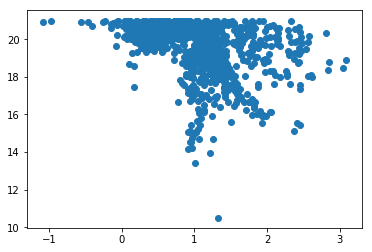

In [30]:
plt.scatter(df['bp_rp'].data,df['phot_g_mean_mag'])

In [31]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

In [33]:
import numpy as np

In [36]:
x=np.arange(-1,3,0.01)

In [37]:
x.size

400

In [40]:
y=-5.0*x+10

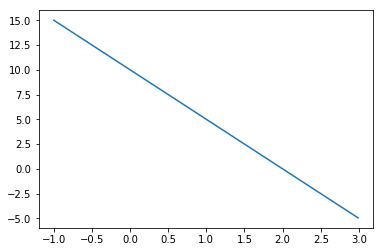

In [41]:
plt.plot(x,y)

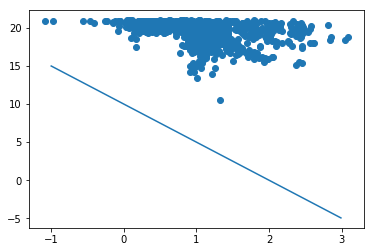

In [42]:
plt.scatter(df['bp_rp'].data,df['phot_g_mean_mag'])
plt.plot(x,y)

In [44]:
good = (df['bp_rp'].data>=0.92)

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [45]:
good

array([ True, False,  True, ...,  True,  True, False], dtype=bool)

In [89]:
good = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<20.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2)

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


In [48]:
len(good)

1520

In [90]:
np.sum(good)

8424

In [67]:
print(df['pmra'][good])

     pmra    
-------------
2.28379565233
2.26413377374
1.84291014744
1.99416064811
1.76684432679
1.97831030262
1.71877267557
1.84270067315
1.57239117457
1.87441580729
          ...
1.93971061564
1.75432470417
1.88255993465
1.87914658212
 1.8948774396
1.91315058962
1.96673517455
1.36418265183
1.33394998051
2.58597787748
1.59881009772
Length = 250 rows


In [94]:
medpmra=np.median(df['pmra'][good])
medpmdec=np.median(df['pmdec'][good])
print(medpmra)
print(medpmdec)

1.52957314827
0.476046208506


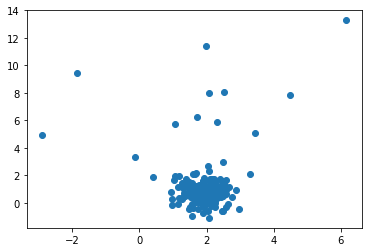

In [70]:
plt.scatter(df['pmra'][good], df['pmdec'][good])

In [49]:
good.size

1520

In [50]:
np.sum(good)

612

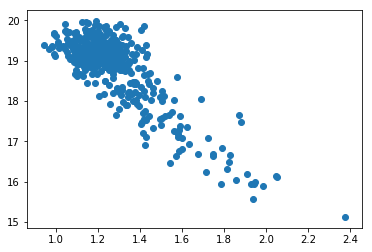

In [53]:
plt.scatter(df['bp_rp'][good], df['phot_g_mean_mag'][good])

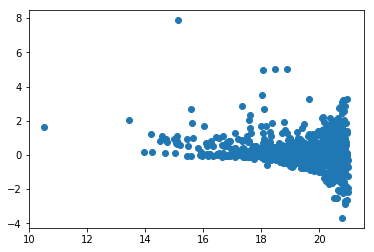

In [54]:
plt.scatter(df['phot_g_mean_mag'], df['parallax'])

In [95]:
pndist=np.sqrt((df['pmra']-medpmra)**2 + (df['pmdec']-medpmdec)**2)

In [61]:
print(pndist)

     pmra     
--------------
 3.22088057486
  3.5423243098
 3.40074320566
 2.38431360682
 4.66402159074
 2.76616174238
           nan
0.495097613668
 2.87060642033
 2.67920629367
           ...
 4.53762431987
 4.73959293857
0.874798541943
 3.08068504185
           nan
 6.11239488898
           nan
           nan
 7.86219575228
 2.64277847561
           nan
Length = 1520 rows


In [99]:
good = (df['bp_rp'].data>=0.92) & (df['bp_rp'].data<=2.5) & (df['phot_g_mean_mag']<19.0) & (df['phot_g_mean_mag']>=(-5.0*df['bp_rp']+24.0)) & (df['phot_g_mean_mag']<=(-5.0*df['bp_rp']+27.0)) & (np.abs(df['parallax'])<=0.2) &(pndist<=2.0)

/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/data0/sw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/data0/sw/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)


In [100]:
np.sum(good)

6061

In [101]:
np.median(df['parallax'][good])

-0.0063871788274025999

In [81]:
print(1/np.median(df['parallax'][good]))

-258.443124094


min ra= 67, max ra= 90; min dec= -76, max dec= -65; steps of 1 degree 
function should print ra and dec, number of good points, the median paralax
2 loops, outer for ra and inner for dec 
put on github 
git add 
git commit
git push 
mv move directory 
../projects/LMC-Paralax